In [5]:
import os
import pandas as pd
import numpy as np
import math
from tqdm import tqdm
import re 


In [88]:


data_path = "D:/source/Falldetector/SisFall_dataset"
fs = os.listdir(data_path)

# Regular expression to match "SA01-SA15" and "SE01-SE15"
pattern = re.compile(r"^(SA|SE)(0[1-9]|1[0-5])$")

# Filter folders matching the pattern
filtered_fs = [f for f in fs if pattern.match(f) and os.path.isdir(os.path.join(data_path, f))]

# Print the count
print(f"Total matching folders: {len(filtered_fs)}\n")

# Print each folder path
for f in filtered_fs:
    print(os.path.join(data_path, f))
    
    lib = os.path.join(data_path, f)
    fs = os.listdir(lib)
    for g in fs:
        print(g)
    


Total matching folders: 30

D:/source/Falldetector/SisFall_dataset\SA01
D01_SA01_R01.txt
D02_SA01_R01.txt
D03_SA01_R01.txt
D04_SA01_R01.txt
D05_SA01_R01.txt
D05_SA01_R02.txt
D05_SA01_R03.txt
D05_SA01_R04.txt
D05_SA01_R05.txt
D06_SA01_R01.txt
D06_SA01_R02.txt
D06_SA01_R03.txt
D06_SA01_R04.txt
D06_SA01_R05.txt
D07_SA01_R01.txt
D07_SA01_R02.txt
D07_SA01_R03.txt
D07_SA01_R04.txt
D07_SA01_R05.txt
D08_SA01_R01.txt
D08_SA01_R02.txt
D08_SA01_R03.txt
D08_SA01_R04.txt
D08_SA01_R05.txt
D09_SA01_R01.txt
D09_SA01_R02.txt
D09_SA01_R03.txt
D09_SA01_R04.txt
D09_SA01_R05.txt
D10_SA01_R01.txt
D10_SA01_R02.txt
D10_SA01_R03.txt
D10_SA01_R04.txt
D10_SA01_R05.txt
D11_SA01_R01.txt
D11_SA01_R02.txt
D11_SA01_R03.txt
D11_SA01_R04.txt
D11_SA01_R05.txt
D12_SA01_R01.txt
D12_SA01_R02.txt
D12_SA01_R03.txt
D12_SA01_R04.txt
D12_SA01_R05.txt
D13_SA01_R01.txt
D13_SA01_R02.txt
D13_SA01_R03.txt
D13_SA01_R04.txt
D13_SA01_R05.txt
D14_SA01_R01.txt
D14_SA01_R02.txt
D14_SA01_R03.txt
D14_SA01_R04.txt
D14_SA01_R05.txt
D15_SA01_R

In [112]:
colsname=["x1","y1","z1","x2","y2","z2","x3","y3","z3",]
df = pd.read_csv("D:/source/Falldetector/SisFall_dataset/SA01/D01_SA01_R01.txt", names=colsname, header=None)
df["z3"] = df["z3"].str.replace(";","").astype("float64")
df = df.astype("float64")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      19999 non-null  float64
 1   y1      19999 non-null  float64
 2   z1      19999 non-null  float64
 3   x2      19999 non-null  float64
 4   y2      19999 non-null  float64
 5   z2      19999 non-null  float64
 6   x3      19999 non-null  float64
 7   y3      19999 non-null  float64
 8   z3      19999 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [3]:
def read_data(file):
    colsname=["x1","y1","z1","x2","y2","z2","x3","y3","z3",]
    df = pd.read_csv(file, names=colsname, header=None)
    df["z3"] = df["z3"].str.replace(";","").astype("float64")
    df = df.astype("float64")
    return df

In [11]:
df=read_data("D:/source/Falldetector/SisFall_dataset/SA01/D01_SA01_R01.txt")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      19999 non-null  float64
 1   y1      19999 non-null  float64
 2   z1      19999 non-null  float64
 3   x2      19999 non-null  float64
 4   y2      19999 non-null  float64
 5   z2      19999 non-null  float64
 6   x3      19999 non-null  float64
 7   y3      19999 non-null  float64
 8   z3      19999 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


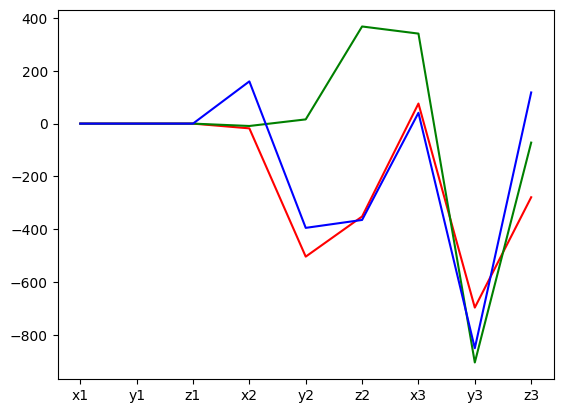

In [98]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
import tensorflow as tf
import cv2

def normalize_data(df):
    # reduce datapoints
    df = df.loc[::2]
    # fix the g units 
    Sensor1_Resolution = 13
    Sensor1_Range = 16
    g_S1 = (2 * Sensor1_Range / 2 ** Sensor1_Resolution)

    # accelerations to g units by doing the calculations
    df.loc[:,'x1'] = g_S1 * df.loc[:,'x1']
    df.loc[:,'y1'] = g_S1 * df['y1']
    df.loc[:,'z1'] = g_S1 * df['z1']
    return df

df=normalize_data(df)

df5 = df.iloc[9900:10000, 0:3]

fig, ax = plt.subplots()
ax.plot(df.iloc[0], label="Acc X", color="red")
ax.plot(df.iloc[1], label="Acc Y", color="green")
ax.plot(df.iloc[2], label="Acc Z", color="blue")
plt.show()

canvas = FigureCanvas(fig)
canvas.draw()
renderer = canvas.get_renderer()
image = np.array(renderer.buffer_rgba())[:, :, :3]
image_rgb = tf.image.resize(image, (100, 100))


In [82]:
print(image_rgb.shape, len(image_rgb))

(100, 100, 3) 100


In [7]:
def normalize_data(df):
    # reduce datapoints
    df = df.loc[::2]
    # fix the g units 
    Sensor1_Resolution = 13
    Sensor1_Range = 16
    g_S1 = (2 * Sensor1_Range / 2 ** Sensor1_Resolution)

    # accelerations to g units by doing the calculations
    df.loc[:,'x1'] = g_S1 * df.loc[:,'x1']
    df.loc[:,'y1'] = g_S1 * df['y1']
    df.loc[:,'z1'] = g_S1 * df['z1']
    return df


In [114]:
df.head()
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      19999 non-null  float64
 1   y1      19999 non-null  float64
 2   z1      19999 non-null  float64
 3   x2      19999 non-null  float64
 4   y2      19999 non-null  float64
 5   z2      19999 non-null  float64
 6   x3      19999 non-null  float64
 7   y3      19999 non-null  float64
 8   z3      19999 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [198]:
df['z1'].min(),df['z1'].max()



(np.float64(-217.0), np.float64(118.0))

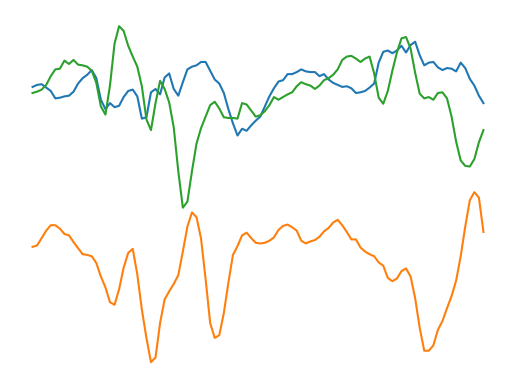

In [14]:
import matplotlib.pyplot as plt
# reduce the amount of data points

df3=normalize_data(df)


ax = df3.iloc[9900:10000, 0:3].plot()
ax.set_axis_off()
ax.get_legend().remove()

In [200]:
df3.shape


(10000, 9)

In [47]:
colsname=["x1","y1","z1","x2","y2","z2","x3","y3","z3",]
df2 = pd.read_csv("D:/source/Falldetector/SisFall_dataset/SA01/F01_SA01_R02.txt", names=colsname, header=None)


In [8]:
df2=read_data("D:/source/Falldetector/SisFall_dataset/SA01/F01_SA01_R02.txt")
df4=normalize_data(df2)

In [39]:
df4.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3
0,0.316406,-0.929688,-0.062500,-24.0,155.0,-119.0,225.0,-903.0,93.0
2,0.332031,-0.898438,-0.093750,-39.0,222.0,-171.0,244.0,-870.0,56.0
4,0.273438,-0.878906,-0.222656,-102.0,249.0,-231.0,217.0,-863.0,-56.0
6,0.179688,-0.957031,-0.343750,-210.0,126.0,-279.0,116.0,-940.0,-198.0
8,-0.031250,-1.054688,-0.500000,-326.0,-136.0,-275.0,-89.0,-1046.0,-349.0


In [40]:
df2["z3"] = df2["z3"].str.replace(";","")
#df["z3"] = df["z3"].str.replace(r"\D", "", regex=True).astype("int64")
df2["z3"] = pd.to_numeric(df2["z3"], errors="coerce").astype("int64")
import matplotlib.pyplot as plt
#df2.loc("z3")=df["z3"].str.replace(";","")
df2.head()
#df2.iloc[1000:2000, 1:3].plot()

AttributeError: Can only use .str accessor with string values!

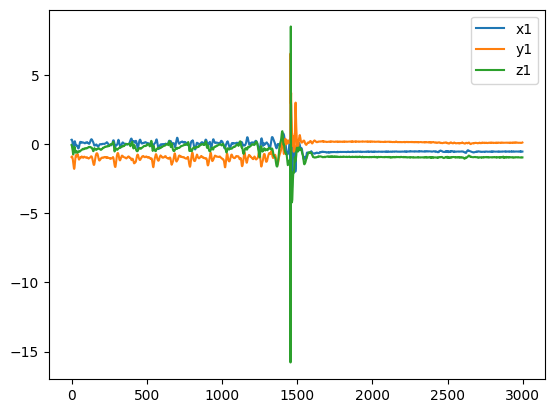

In [9]:
ax=df4.iloc[:, 0:3].plot()
# ax.set_axis_off()
# ax.get_legend().remove()


In [106]:
df4['x1'].abs().max()

np.float64(8.2890625)

In [207]:
# df=read_data("D:/source/Falldetector/SisFall_dataset/SA01/D01_SA01_R01.txt")
from pathlib import Path

#DATA_DIRECTORY = Path(__file__).parents[2] / "data"
#from Fallapp.UTILS.constants import DATA_DIRECTORY
DATA_DIRECTORY=f"{Path.cwd()}\data"
def handle_file_fig_name(filename):
    tmpfile = os.path.basename(filename)  
    figfile = os.path.splitext(tmpfile)[0]
    return figfile

def create_data_sw(filename, df):
    x,y=df.shape
    in_wx=0
    namefig=handle_file_fig_name(filename)

    for wx in range(100,x+100,100):
        figure = f"{namefig}-{wx-100}-{wx}.jpg"
        ax=df.iloc[wx-100:wx, 0:3].plot(color=['black', 'grey', 'lightgrey'])
        #ax.set_xlim(0, 12)  # Set X-axis scale (min, max)
        ax.set_ylim(-13,13)  # Set Y-axis scale (min, max)
        in_wx=wx
        #outputpath= f" - {DATA_DIRECTORY}\{figure}"
        outputpath = Path(DATA_DIRECTORY) / figure
        print(outputpath)
        plt.savefig(outputpath, format='jpg', dpi=300)
    

In [3]:
df=df4
print(df['x1'].min(), df['x1'].max(), df['y1'].min(), df['y1'].max(), df['z1'].min(), df['z1'].max())


NameError: name 'df4' is not defined

d:\source\Falldetector\data\F01_SA01_R02-0-100.jpg
d:\source\Falldetector\data\F01_SA01_R02-100-200.jpg
d:\source\Falldetector\data\F01_SA01_R02-200-300.jpg
d:\source\Falldetector\data\F01_SA01_R02-300-400.jpg
d:\source\Falldetector\data\F01_SA01_R02-400-500.jpg
d:\source\Falldetector\data\F01_SA01_R02-500-600.jpg
d:\source\Falldetector\data\F01_SA01_R02-600-700.jpg
d:\source\Falldetector\data\F01_SA01_R02-700-800.jpg
d:\source\Falldetector\data\F01_SA01_R02-800-900.jpg
d:\source\Falldetector\data\F01_SA01_R02-900-1000.jpg
d:\source\Falldetector\data\F01_SA01_R02-1000-1100.jpg
d:\source\Falldetector\data\F01_SA01_R02-1100-1200.jpg
d:\source\Falldetector\data\F01_SA01_R02-1200-1300.jpg
d:\source\Falldetector\data\F01_SA01_R02-1300-1400.jpg
d:\source\Falldetector\data\F01_SA01_R02-1400-1500.jpg


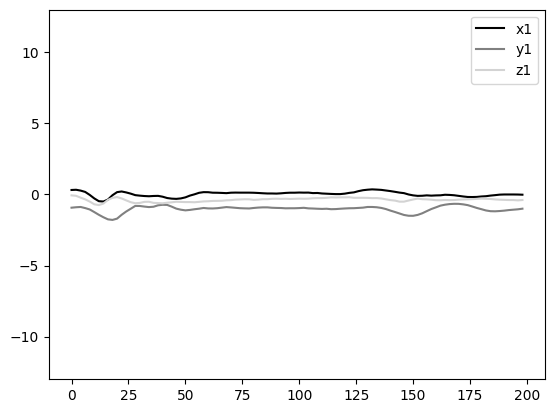

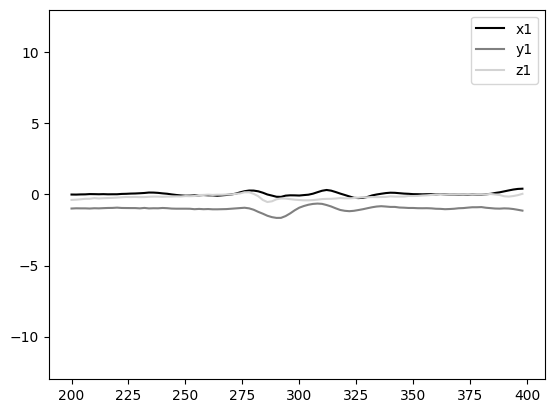

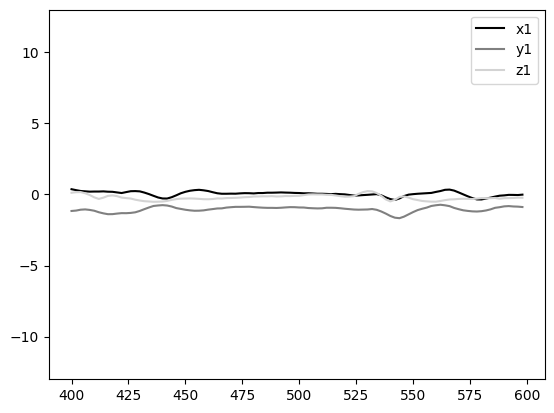

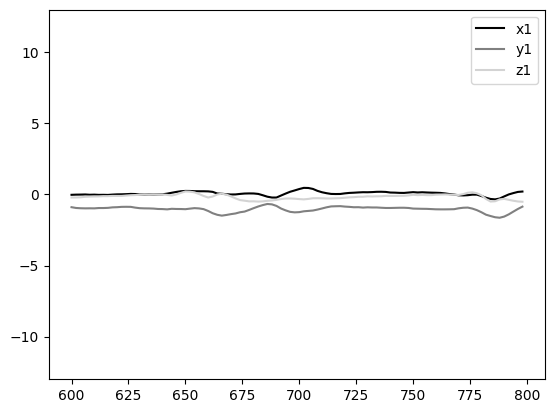

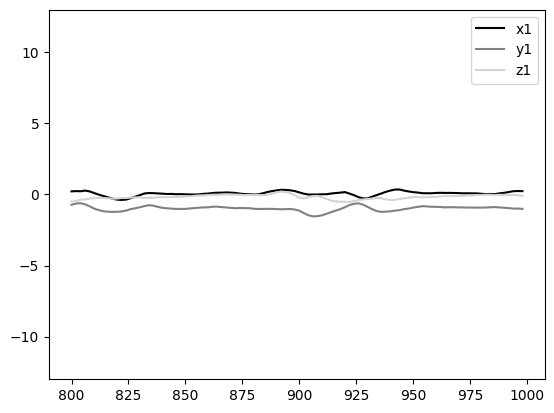

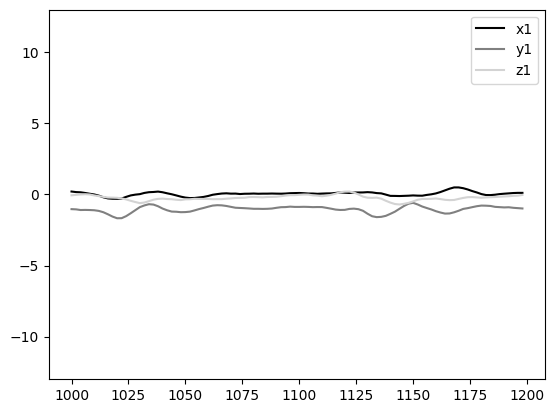

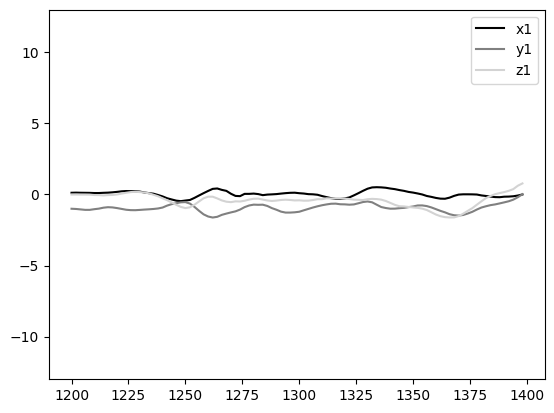

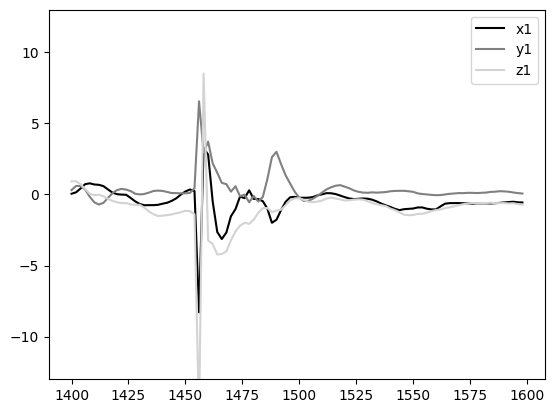

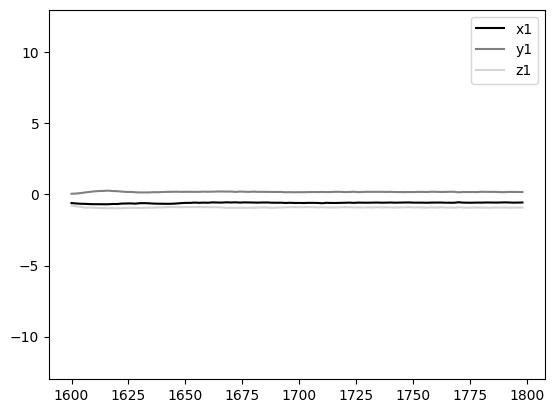

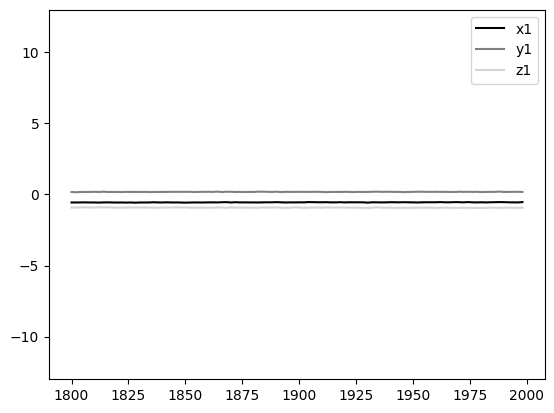

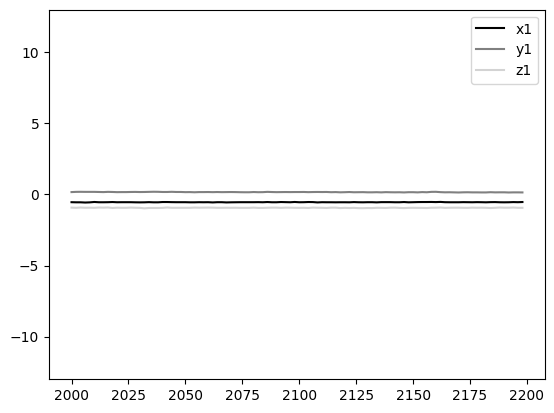

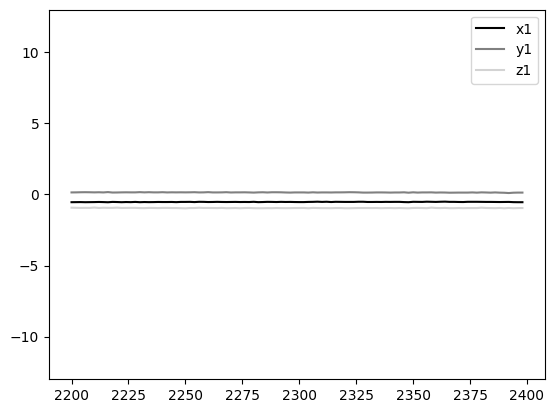

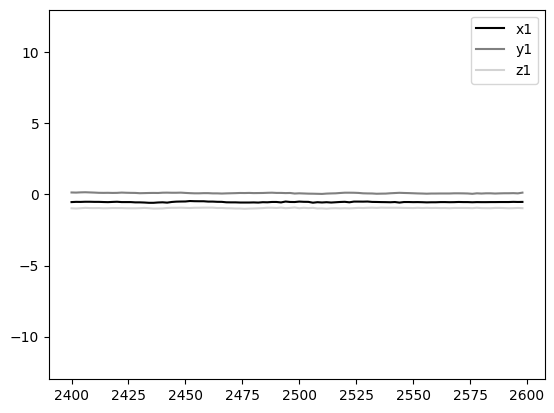

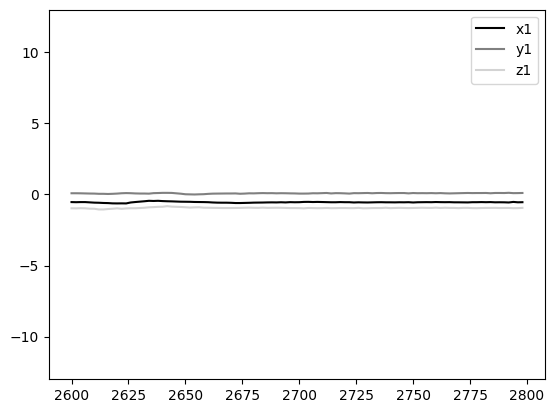

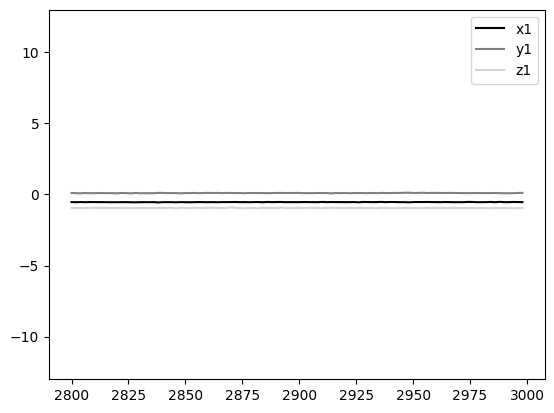

In [ ]:
create_data_sw("D:/source/Falldetector/SisFall_dataset/SA01/F01_SA01_R02.txt",df4)

image = plt.imread("D:/source/Falldetector/Data/D01_SA01-0-100.jpg")

print(f"{type(image) = }")
# the last dimension indicates that its colors and in 
# open cv it is actually BGR and not RGB 
print(f"{image.shape = }")
min(image.flatten()), max(image.flatten()) 

In [5]:
import matplotlib.pyplot as plt

image = plt.imread("D:/source/Falldetector/data/D01_SA01_R01-0-100.jpg")

print(f"{type(image) = }")
# the last dimension indicates that its colors and in 
# open cv it is actually BGR and not RGB 
print(f"{image.shape = }")
min(image.flatten()), max(image.flatten()) 

type(image) = <class 'numpy.ndarray'>
image.shape = (1440, 1920, 3)


(np.uint8(0), np.uint8(255))

In [16]:
from sklearn.model_selection import train_test_split
import pickle
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
# from keras.utils import to_categorical
from numpy import array
from numpy import argmax

from keras._tf_keras.keras import Sequential
from keras._tf_keras.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras._tf_keras.keras.optimizers import Adam
from keras._tf_keras.keras.callbacks import EarlyStopping
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator


In [19]:
def load_data(pathfile):
    f = open(pathfile, 'rb')
    obj1, obj2 = pickle.load(f)
    f.close()
    arr = np.random.choice(np.arange(0, len(obj1)), size=len(obj1), replace=False)
    obj3=[obj1[i] for i in arr]
    obj4=[obj2[i] for i in arr]
    return [obj3, obj4]

def toOneHot(data):
    code=[]
    for x in data:
        if x=='normal':
            code.append(0)
        else:
            code.append(1)
    return np.array(code)


# Läs in data till variabler
X_train, y_train=load_data("normalized-data/train.dat")
X_test, y_test=load_data("normalized-data/test.dat")
X_train2, y_train2 =load_data("normalized-data/train2.dat") # train excl. validation
X_val, y_val=load_data("normalized-data/validate.dat") # val

y_train=toOneHot(y_train)
y_test=toOneHot(y_test)
y_train2=toOneHot(y_train2) 
y_val=toOneHot(y_val)

# fix for max value in RGB channel

X_train2 = (np.array(X_train2)/255).astype(np.uint8)
X_test = (np.array(X_test)/255).astype(np.uint8)
X_train = (np.array(X_train)/255).astype(np.uint8)
X_val = (np.array(X_val)/255).astype(np.uint8)

# print(f" {min(X_val[0].flatten()), max(X_val.flatten())}")





train_image_generator = ImageDataGenerator(
    rotation_range=0, # 35 grader rotation 
    shear_range=0,
    zoom_range=0,
    horizontal_flip=False,# tillåt flip  (spegelvänd bild)
    vertical_flip=False, 
    height_shift_range=0.0,
    width_shift_range=0.0,
)
# don't augment test data and validation data as we want to test on original data
# we just instantiate an ImageDataGenerator without augmentation
test_image_generator = ImageDataGenerator()

# batch size 32 for mini-batch gradient descent - gives stocasticity (avoid local minima)
# flow used for regenerating images after it has been exhausted
# this beacause we will train in many epochs
train_val_generator = train_image_generator.flow(
    X_train2, np.array(y_train2), batch_size=32
)

# batch size 32 for mini-batch gradient descent 
train_generator = train_image_generator.flow(
    X_train, np.array(y_train), batch_size=32
)

# train_generator[0][0].shape -> a 32 images batch

val_generator = test_image_generator.flow(X_val, np.array(y_val), batch_size=32)


In [52]:
print(len(X_train2), len(y_train2), len(X_val), len(y_val), len(X_test), len(y_test))


2639 2639 661 661 827 827


In [20]:
len(X_train2)

#sampled = np.random.choice(arr, size=int(len(arr) * 0.1), replace=False)
arr = np.random.choice(np.arange(0, len(X_train2)), size=int(len(X_train2)*0.1), replace=False)

X_train=[]
y_train=[]

Xs = np.array([X_train2[index] for index in arr])
Ys = [y_train2[index] for index in arr]

train_smal_generator = train_image_generator.flow(
    Xs, Ys, batch_size=32
)
#print(len(Xs.shape))

In [12]:
y_keep=[]
for i in range(len(y_train)):
    #if y_train[i]==1:
    print(y_train[i])

In [22]:

def CNN_model(learning_rate=0.001, drop_rate=0.3, kernels=[32, 64]):

    print(drop_rate)
    # default learning rate in Adam, Adam is an optimizor for learning rate
    adam = Adam(learning_rate=learning_rate)

    model = Sequential(name="CNN_model")

    # creating a convulutional layer 
    for number_kernel in kernels:
        conv_layer = Conv2D(
            number_kernel, # number of kernels in each layer
            kernel_size=(3, 3), # also (5,5), (7,7) - filter size
            activation="relu", # good startingpoint
            kernel_initializer="he_normal", # initilazing weights, good to use with relu
            input_shape=Xs.shape[1:], # 32x32x3
        )

        model.add(conv_layer)
        # defaults to pool_size if None
        model.add(MaxPooling2D(pool_size=(2, 2), strides = 2)) # these can also be tuned

    model.add(Flatten())
    model.add(Dropout(drop_rate))
    model.add(Dense(512, activation="relu", kernel_initializer="he_normal"))
    model.add(Dense(2, activation="softmax")) # sotfmax -> probabilities for each output

    model.compile(
        loss="sparse_categorical_crossentropy", optimizer=adam, metrics=["acc"]
    )

    return model

model = CNN_model(.001, .5, [32, 64, 128, 128])

model.summary()


0.5


d:\source\Falldetector\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 21, 21, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     1,049,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,290,946 (4.92 MB)

 Trainable params: 1,290,946 (4.92 MB)

 Non-trainable params: 0 (0.00 B)

In [54]:
# number of steps for minibatch in one epoch
steps_per_epochs = len(Xs)/32
validation_steps = len(X_val)/32


early_stopper = EarlyStopping(
    monitor="val_acc", mode="max", patience=150, restore_best_weights=True
)

model.fit(
    train_smal_generator,
    steps_per_epoch=int(steps_per_epochs),
    epochs=200,
    callbacks=[early_stopper],
    validation_data=val_generator,
    validation_steps=int(validation_steps),
)


Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - acc: 0.5408 - loss: 2.8078

d:\source\Falldetector\.venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 486ms/step - acc: 0.5438 - loss: 2.7212 - val_acc: 0.6938 - val_loss: 0.6557
Epoch 2/200
1/8 ━━━━━━━━━━━━━━━━━━━━ 2s 293ms/step - acc: 0.5000 - loss: 1.0331

d:\source\Falldetector\.venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 197ms/step - acc: 0.5000 - loss: 1.0331 - val_acc: 0.3031 - val_loss: 0.7161
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 424ms/step - acc: 0.4674 - loss: 0.7433 - val_acc: 0.6953 - val_loss: 0.6444
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - acc: 0.5625 - loss: 0.7010 - val_acc: 0.7000 - val_loss: 0.6685
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 403ms/step - acc: 0.6553 - loss: 0.6584 - val_acc: 0.6938 - val_loss: 0.6351
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - acc: 0.4688 - loss: 0.8333 - val_acc: 0.6922 - val_loss: 0.6327
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 486ms/step - acc: 0.6065 - loss: 0.6591 - val_acc: 0.6922 - val_loss: 0.6481
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 191ms/step - acc: 0.7500 - loss: 0.6181 - val_acc: 0.7031 - val_loss: 0.6397
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 433ms/step - acc: 0.6562 - loss: 0.6405 - val_acc: 0.6922 - val_loss: 0.6409
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 185ms/step - acc: 0.5625 - loss: 0.

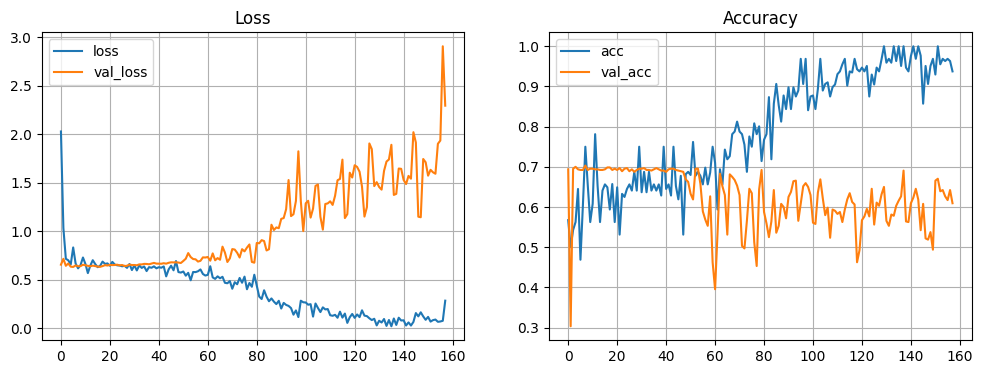

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
metrics = pd.DataFrame(model.history.history)
metrics.head()

def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True)
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True)

plot_metrics(metrics)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       573
           1       0.00      0.00      0.00       254

    accuracy                           0.69       827
   macro avg       0.35      0.50      0.41       827
weighted avg       0.48      0.69      0.57       827



d:\source\Falldetector\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\source\Falldetector\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\source\Falldetector\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(array([0, 1]), [Text(0, 0, 'Normal'), Text(1, 0, 'Fall')])

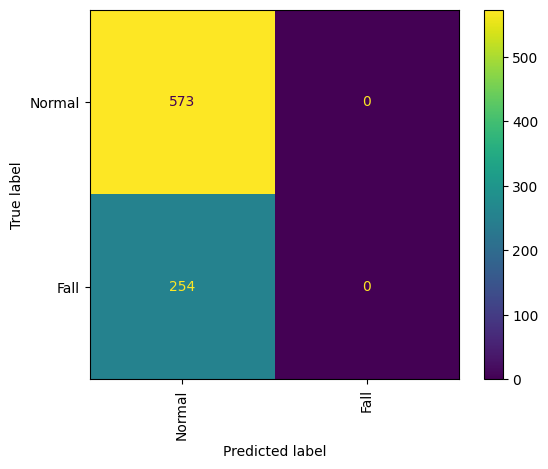

In [56]:
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

y_pred = model.predict(X_test)
#y_pred = np.argmax(y_pred)

y_pred = np.argmax(y_pred, axis = 1)

labels=["Normal", "Fall"]

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.xticks(rotation = 90)


In [57]:
from keras._tf_keras.keras.callbacks import ReduceLROnPlateau

model7 = CNN_model(.001, .5, [32, 64, 128, 128])

# want to minimize monitored metric (val_loss)
# early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=100)
early_stopper = EarlyStopping(monitor="val_loss", mode="min", patience=30)

# inspirerad från Stack Overflow
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=30, min_lr=0.00001)


model7.fit(
    X_train,
    y_train,
    epochs=200,
    callbacks=[early_stopper, reduce_lr],
    validation_split=1 / 5,
)

0.5


d:\source\Falldetector\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 26s 250ms/step - acc: 0.6937 - loss: 1.1579 - val_acc: 0.8232 - val_loss: 0.3854 - learning_rate: 0.0010
Epoch 2/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 24s 252ms/step - acc: 0.8941 - loss: 0.2800 - val_acc: 0.9523 - val_loss: 0.1322 - learning_rate: 0.0010
Epoch 3/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 26s 263ms/step - acc: 0.9489 - loss: 0.1447 - val_acc: 0.9690 - val_loss: 0.0867 - learning_rate: 0.0010
Epoch 4/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 25s 262ms/step - acc: 0.9686 - loss: 0.0954 - val_acc: 0.9845 - val_loss: 0.0400 - learning_rate: 0.0010
Epoch 5/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 41s 256ms/step - acc: 0.9786 - loss: 0.0704 - val_acc: 0.9729 - val_loss: 0.0605 - learning_rate: 0.0010
Epoch 6/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 26s 267ms/step - acc: 0.9802 - loss: 0.0587 - val_acc: 0.9845 - val_loss: 0.0457 - learning_rate: 0.0010
Epoch 7/200
97/97 ━━━━━━━━━━━━━━━━━━━━ 39s 246ms/step - acc: 0.9883 - loss: 0.0372 - val_acc: 0.9910 - val_loss: 0.0323 - learning_rate:

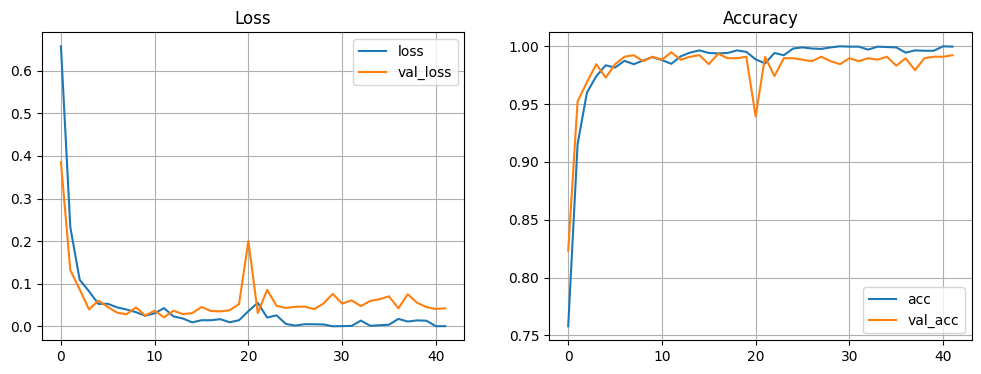

In [58]:
metrics = pd.DataFrame(model7.history.history)
metrics.head()

def plot_metrics(metrics):
    _, ax = plt.subplots(1,2, figsize = (12,4))
    metrics[["loss", "val_loss"]].plot(ax = ax[0], title = "Loss", grid = True)
    metrics[["acc", "val_acc"]].plot(ax = ax[1], title = "Accuracy", grid = True)

plot_metrics(metrics)

26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       573
           1       1.00      0.95      0.97       254

    accuracy                           0.98       827
   macro avg       0.99      0.97      0.98       827
weighted avg       0.98      0.98      0.98       827



(array([0, 1]), [Text(0, 0, 'Normal'), Text(1, 0, 'Fall')])

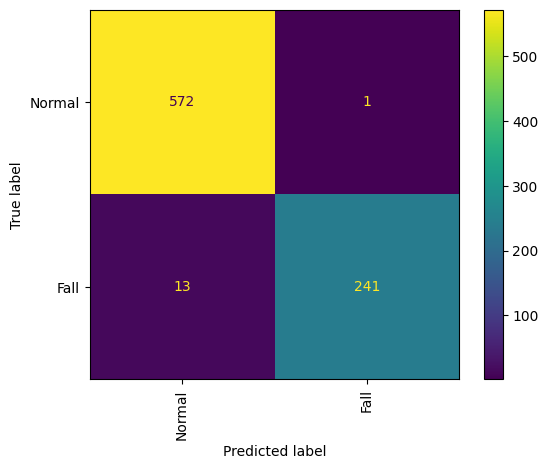

In [59]:
y_pred = model7.predict(X_test)
#y_pred = np.argmax(y_pred)

y_pred = np.argmax(y_pred, axis = 1)

labels=["Normal", "Fall"]

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=labels).plot()
plt.xticks(rotation = 90)

In [60]:
model7.save("d:/source/Falldetector/Fallapp/model.keras")

In [99]:
image_rgb = tf.ensure_shape(image_rgb, (100, 100, 3))

# Convert uint8 to float32 and normalize
image_rgb = tf.cast(image_rgb, tf.float32) / 255.0

# Add batch dimension if required by model
image_rgb = tf.expand_dims(image_rgb, axis=0)  # Shape: (1, 100, 100, 3)

# Pass to model
predictions = model7.predict(image_rgb)
#y_pred2 = model7.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 497ms/step


In [100]:
predictions

array([[0.00385883, 0.99614114]], dtype=float32)

In [ ]:
model2 = CNN_model(.001, .5, [32, 64, 128, 128])

train2_generator = ImageDataGenerator(
    rotation_range=0, # 35 grader rotation 
    shear_range=0,
    zoom_range=0,
    horizontal_flip=False,# tillåt flip  (spegelvänd bild)
    vertical_flip=False, 
    height_shift_range=0.0,
    width_shift_range=0.0,
)